In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('market_data.csv')

In [3]:
data.head()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91


In [4]:
data.isna().sum()

Sale                 0
InStrSpending        0
Discount             0
TVSpending           0
StockRate            0
Price                0
Radio                0
OnlineAdsSpending    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sale               992 non-null    int64  
 1   InStrSpending      992 non-null    float64
 2   Discount           992 non-null    float64
 3   TVSpending         992 non-null    float64
 4   StockRate          992 non-null    float64
 5   Price              992 non-null    float64
 6   Radio              992 non-null    int64  
 7   OnlineAdsSpending  992 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 62.1 KB


C:\Users\Dell\AppData\Local\Temp\ipykernel_32244\555419178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sale'])


<Axes: xlabel='Sale', ylabel='Density'>

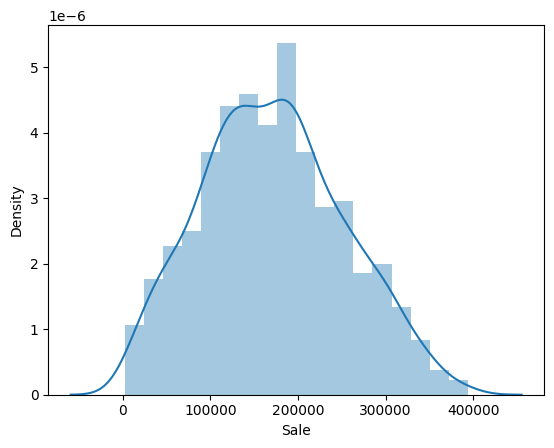

In [7]:
sns.distplot(data['Sale'])

In [10]:
from sklearn.model_selection import train_test_split

In [17]:
x = data[['Price', 'TVSpending', 'InStrSpending', 'OnlineAdsSpending', 'Discount', 'StockRate', 'Radio']]
y = data['Sale']

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)


In [18]:
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)


****************Training Data Shape********************

Training data-X- Shape:	 (744, 7)

Training data-y- Shape:	 (744,)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (248, 7)

Testing data(y-Outcome) Shape:	 (248,)


Base Model

1. Linear Regression Model


In [19]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('*'*100)
print('Linear Regression Model')
print('*'*100)
print('\n Training Phase')
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_lin_reg=lin_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print('Accuracy Score - Linear Regression:\t',Accuracy_lin_reg)
print()
print('MSE-linear Regression:\t',MSE_lin_reg)
print()
print('RMSE linear Regression:\t',RMSE_lin_reg)


****************************************************************************************************
Linear Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Linear Regression:	 0.9985361151149602

MSE-linear Regression:	 10763782.827434994

RMSE linear Regression:	 3280.8204503500333


2. KNN Regression

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=3)
print('*'*100)
print('KNN Regression Model')
print('*'*100)
print('\n Training Phase')
knn_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',knn_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_knn=knn_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('KNN Regression - Performance Measures')
print('*'*100)
Accuracy_knn_reg=r2_score(ytest,ypred_knn)
MSE_knn=mean_squared_error(ytest,ypred_knn)
RMSE_knn=np.sqrt(mean_squared_error(ytest,ypred_knn))
print('Accuracy Score - knn Regression:\t',Accuracy_knn_reg)
print()
print('MSE-knn Regression:\t',MSE_knn)
print()
print('RMSE knn Regression:\t',RMSE_knn)

****************************************************************************************************
KNN Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
KNN Regression - Performance Measures
****************************************************************************************************
Accuracy Score - knn Regression:	 -0.15318786878051016

MSE-knn Regression:	 8479262205.408154

RMSE knn Regression:	 92082.90940998853


3. Decision Tree Regression model


In [21]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
print('*'*100)
print('DT Regression Model')
print('*'*100)
print('\n Training Phase')
dt_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_dt_reg=dt_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))
print('Accuracy Score - DT Regression:\t',Accuracy_dt_reg)
print()
print('MSE-DT Regression:\t',MSE_dt_reg)
print()
print('RMSE DT Regression:\t',RMSE_dt_reg)

****************************************************************************************************
DT Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - DT Regression:	 0.9260156804894705

MSE-DT Regression:	 543998476.9193548

RMSE DT Regression:	 23323.774928586383


4. Support Vector Regressor

In [23]:
from sklearn.svm import SVR
svr=SVR()
print('*'*100)
print('SVR Regression Model')
print('*'*100)
print('\n Training Phase')
svr.fit(xtrain,ytrain)
print('Hyperparameter:\n',svr.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_svr=svr.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('SVR Regression - Performance Measures')
print('*'*100)
Accuracy_svr=r2_score(ytest,ypred_svr)
MSE_svr=mean_squared_error(ytest,ypred_svr)
RMSE_svr=np.sqrt(mean_squared_error(ytest,ypred_svr))
print('Accuracy Score - SVR Regression:\t',Accuracy_svr)
print()
print('MSE-SVR Regression:\t',MSE_svr)
print()
print('RMSE SVR Regression:\t',RMSE_svr)

****************************************************************************************************
SVR Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
SVR Regression - Performance Measures
****************************************************************************************************
Accuracy Score - SVR Regression:	 -0.0025667316230357784

MSE-SVR Regression:	 7371761727.636431

RMSE SVR Regression:	 85858.96416587164


5.Boosting - Adaboost with the base model - Lin
reg


In [24]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*100)
print('AdaBoost Regression Model')
print('*'*100)
print('\n Training Phase')
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_ada=ada.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Adaboost Regression - Performance Measures')
print('*'*100)
Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))
print('Accuracy Score - Adaboost Regression:\t',Accuracy_ada)
print()
print('MSE-Adaboost Regression:\t',MSE_ada)
print()
print('RMSE Adaboost Regression:\t',RMSE_ada)

****************************************************************************************************
AdaBoost Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 15, 'random_state': None}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Adaboost Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Adaboost Regression:	 0.9985098592459514

MSE-Adaboost Regression:	 10956839.313532433

RMSE Adaboost Regression:	 3310.111676897387


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


6. Boosting - GradientBoost

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost=GradientBoostingRegressor(n_estimators=60)
print('*'*100)
print('GradientBoosting Regression Model')
print('*'*100)
print('\n Training Phase')
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_grad_boost=grad_boost.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('GradientBoosting Regression - Performance Measures')
print('*'*100)
Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))
print('Accuracy Score - GradientBoosting Regression:\t',Accuracy_grad_boost)
print()
print('MSE-GradientBoosting Regression:\t',MSE_grad_boost)
print()
print('RMSE GradientBoosting Regression:\t',RMSE_grad_boost)

****************************************************************************************************
GradientBoosting Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 60, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
GradientBoosting Regression - Performance Measures
********************************************************************

Model with Accuracy scores

In [34]:
scores=[('Linear Regression',Accuracy_lin_reg),
 ('KNN Regression',Accuracy_knn_reg),
 ('Decision Tree Regression',Accuracy_dt_reg),
 ('SVR',Accuracy_svr),
 ('Adaboost Regressor',Accuracy_ada),
 ('Gradient Boost Regressor',Accuracy_grad_boost),
 
 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))


                      Model  Accuracy_score
0         Linear Regression        0.998536
4        Adaboost Regressor        0.998510
5  Gradient Boost Regressor        0.980913
2  Decision Tree Regression        0.926016
3                       SVR       -0.002567
1            KNN Regression       -0.153188


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'Decision Tree Regression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'Adaboost Regressor'),
  Text(5, 0, 'Gradient Boost Regressor')])

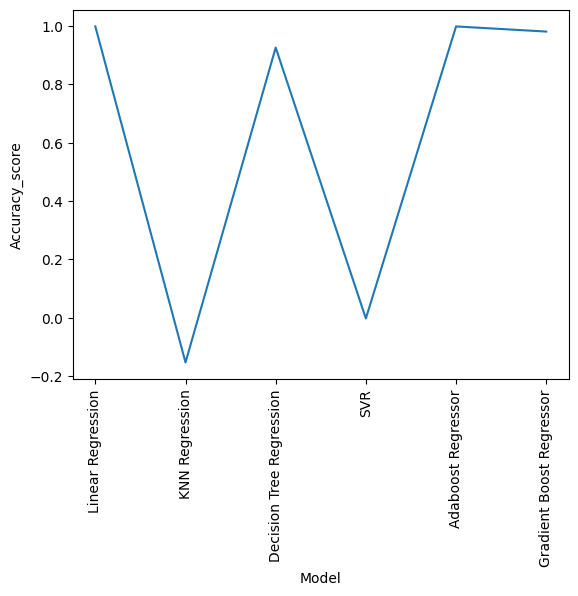

In [36]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)